In [47]:
import pandas as pd

# Cargar el archivo CSV
file_path = "global-hidden-hunger-index-in-pre-school-children.csv"
df = pd.read_csv(file_path)

In [48]:
#!pip install pycountry_convert==0.7.2 #Correr una sola vez

In [49]:
import pycountry_convert as pc
import pandas as pd

def asignar_region(pais):
    """
    Asigna la región correspondiente a un país.

    Args:
        pais: El nombre del país.

    Returns:
        La región del país o "Unknown" si no se encuentra.
    """
    try:
        country_code = pc.country_name_to_country_alpha2(pais)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "OC": "Oceania",
            "SA": "South America"
        }
        return continent_name.get(continent_code, "Unknown")
    except:
        # Si pycountry_convert falla, buscar en el diccionario manual
        country_region_map = {
            'Afghanistan': 'Asia',
            'Albania': 'Europe',
            'Algeria': 'Africa',
            # ... (agregar más países según sea necesario)
        }
        return country_region_map.get(pais, "Unknown")

# Aplicar la función al dataframe
df["Region"] = df["Entity"].apply(asignar_region)


<ipython-input-50-90dfeda3d9a8>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




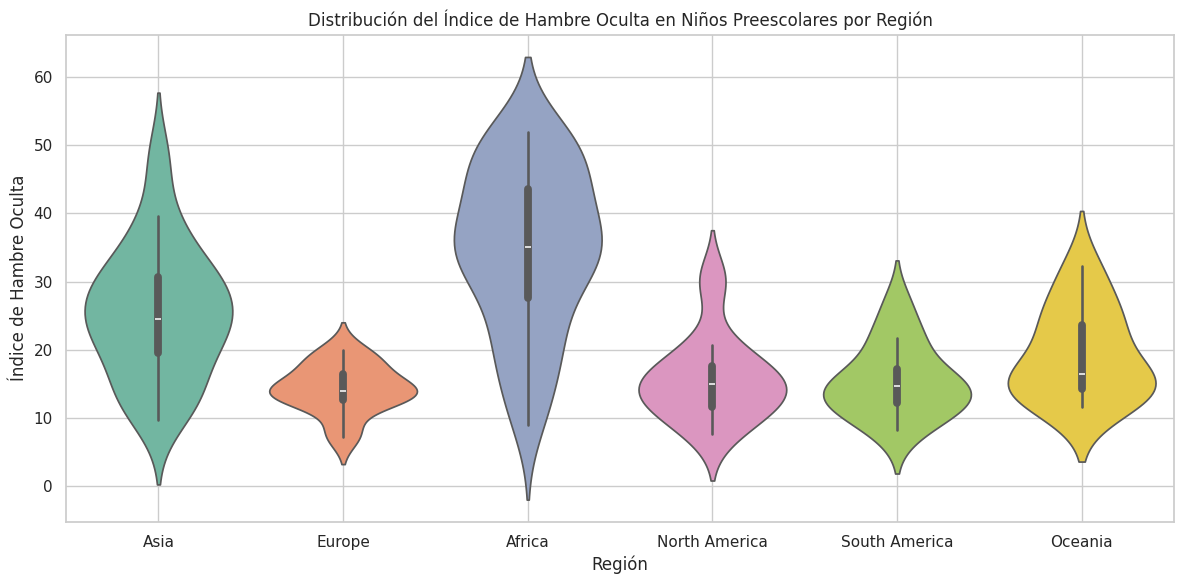

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo países con región conocida
df_known = df[df["Region"] != "Unknown"].copy()

# Renombrar la columna del índice de hambre oculta para facilitar
df_known.rename(columns={
    'Hidden Hunger Index in pre-school children (Muthayya et al. (2013))': 'Hidden Hunger Index'
}, inplace=True)

# Convertir la columna de índice a numérica
df_known["Hidden Hunger Index"] = pd.to_numeric(df_known["Hidden Hunger Index"], errors='coerce')

# Crear gráfico de violín
plt.figure(figsize=(12, 6))
sns.violinplot(x="Region", y="Hidden Hunger Index", data=df_known, palette="Set2", inner="box")
plt.title("Distribución del Índice de Hambre Oculta en Niños Preescolares por Región")
plt.ylabel("Índice de Hambre Oculta")
plt.xlabel("Región")
plt.grid(True)
plt.tight_layout()
plt.show()

#https://ourworldindata.org/grapher/global-hidden-hunger-index-in-pre-school-children

In [51]:
file_path = "child-mortality-gdp-per-capita.csv"
df_mortality = pd.read_csv(file_path)

In [52]:
import plotly.express as px
import pandas as pd

# --- 1. SLOPE CHART ---
# Filtrar solo 2000 y 2022 para slope chart
df_slope = df_mortality[df_mortality["Year"].isin([2000, 2022])]
df_slope = df_slope.dropna(subset=["Under-five mortality rate"])

# Seleccionar países que tengan datos en ambos años
valid_countries = df_slope["Entity"].value_counts()
valid_countries = valid_countries[valid_countries == 2].index
df_slope = df_slope[df_slope["Entity"].isin(valid_countries)]

# --- 2. PARALLEL COORDINATES ---
# Filtrar 2022 con columnas necesarias
df_parallel = df_mortality[df_mortality["Year"] == 2022].dropna(subset=[
    "Under-five mortality rate", "GDP per capita", "Population (historical)"
])
df_parallel = df_parallel.rename(columns={
    "Under-five mortality rate": "Mortalidad Infantil",
    "GDP per capita": "PIB per cápita",
    "Population (historical)": "Población"
})

fig_parallel = px.parallel_coordinates(
    df_parallel,
    dimensions=["Mortalidad Infantil", "PIB per cápita", "Población"],
    color="Mortalidad Infantil",
    title="Coordenadas Paralelas: Países en 2022",
    color_continuous_scale="Viridis"  # escala de color corregida
)

fig_parallel.show()
#https://ourworldindata.org/grapher/child-mortality-gdp-per-capita